# 朴素贝叶斯

朴素贝叶斯是文本分类常用的算法，本文将详细叙述朴素贝叶斯算法的数学原理。

符号定义：  
* $n$：词汇表大小  
* $X$：训练语料库，由$m$篇文档组成，$X=\{x^{(1)},x^{(2)},...,x^{(m)}\}$    
* $x=(x_1,x_2,...,x_n)$：一篇文章的特征向量，其中$x_i$表示词汇表中第$i$个词$w_i$的词频或者tfidf。这里为了简化数学推导，我们假设$d$是二进制变量构成的向量，即$x_i\in\{0,1\}$，1表示$w_i$出现，0表示$w_i$未出现   
* $K$：文档的类别数，为了简化推导，假设K=2即二元分类的情形  
* $y$：文档的类别  
* $p(y=k|x)$：表示文档$x$属于类别$k$的后验概率

## 贝叶斯分类器

分类器可以理解为一个从特征$x$到类别$y$的映射关系：
$$f:x\to y$$
而贝叶斯分类器的原理是将样本分到后验概率最大的类
$$ \hat{y}=\arg\max_{k} p(y=k|x) $$

为了数学上的简便，我将概率$p(y=k|x)$简记为$p(y_k|x)$

## 伯努利朴素贝叶斯
我们以在$k=2$的情况为例，推导朴素贝叶斯的参数估计，这种情况下的朴素贝叶斯模型称为伯努利朴素贝叶斯。


回想贝叶斯公式：
$$p(y|x)=\frac{p(x|y)p(y)}{p(x)}$$
其中
* $p(y)$称为先验概率
* $p(x|y)$称为似然概率
* $p(y|x)$称为后验概率
* $p(x)$是归一化因子，保证概率之和为1

由于训练样例$x$是事先已知的，因此$p(x)$可以视为常量，我们只需要考虑上式的分子，因此目标函数可以简化为
$$p(y|x)\propto p(x|y)p(y)$$

因此我们可以将贝叶斯分类器的决策函数改写为

$$ \begin{aligned}\hat{y}&=\arg\max_{k} p(y_k|x) \\&=\arg\max_{k} p(x,y_k)\\&=\arg\max_{k} p(x|y_k)p(y_k)\\&=\arg\max_{k} p(x_1,x_2,...,x_n|y_k)p(y_k)\end{aligned}$$

那么问题来了，似然概率$p(x_1,x_2,...,x_n|y_k)$怎么计算？  

如果根据条件概率的公式，我们可以做如下的拆解：

$$ p(x_1,x_2,...,x_n|y_k)=p(x_1|y_k)p(x_2|y_k,x_1)\cdots p(x_n|y_k,x_1,...,x_{n-1})$$

朴素贝叶斯作了一个很巧妙也很naive的假设，如果在给定$y$的前提下，特征之间相互独立。那么在给定$y$的情况下，$x_n$与$x_1,x_2,...,x_{n-1}$都无关，即$p(x_n|y_k,x_1,...,x_{n-1})=p(x_n|y_k)$，于是我们有

$$\begin{aligned}p(x_1,x_2,...,x_n|y_k)&=\prod_{j=1}^n p(x_j|y_k)\\&=\prod_{j=1}^n (p(x_j=1|y_k))^{x_j}\cdot (1-p(x_j=1|y_k)^{(1-x_j)}\\&=\prod_{j=1}^n \phi_{jk}^{x_j}(1-\phi_{jk})^{(1-x_j)}\end{aligned}$$


其中$\phi_{jk}=p(x_j=1|y=k)$，表示类别为$k$的情况下，第$j$个词出现的概率  
定义$\phi_k=p(y=k)$，那么决策函数进一步简化为

$$ \hat{y}=\arg\max_{k} p(y_k|x) =\arg\max_{k} \phi_k \prod_{i=1}^n \phi_{jk}^{x_j}(1-\phi_{jk})^{(1-x_j)}$$

如果我们知道了$\phi_{jk}$，$\phi_k$就可以预测每篇文章的类别。对于$\phi_{jk}$来说，参数个数一共是$K*n$，其中$n$是词汇表大小，$K$是类别数，对于二分类的情形来说，我们只需要估计$2n$个参数；对于$\phi_k$来说，参数一共有$K$个，二分类的情况下该参数一共就只有2个（$\phi_0$和$\phi_1$）。

$$P(X|Y)=P(X)$$
$$P(X|Y)=P(X,Y)/P(Y)$$
$$P(X,Y)=P(X)P(Y)$$


### MAP目标函数

最大后验估计（MAP）是朴素贝叶斯的基石，本小节将详细叙述如何用MAP估计朴素贝叶斯模型的参数。    
透过上一小节的推导，我们知道后验概率与$(x,y)$的联合概率成正比
$$p(y|x)\propto p(x,y)$$

现在让我们假设训练集的样本之间是独立同分布的，那么我们可以把生成该训练集的概率表示为

$$ \begin{aligned}P(X,Y)&=\prod_{i=1}^m p(x^{(i)}, y^{(i)})\\&=\prod_{i=1}^m p(y^{(i)})p(x^{(i)}|y^{(i)})\\&=\prod_{i=1}^m \phi_{y^{(i)}} \prod_{j=1}^n \phi_{jy^{(i)}}^{x^{(i)}_j}(1-\phi_{jy^{(i)}})^{(1-x^{(i)}_j)}\end{aligned}$$


其对数似然为
$$ \begin{aligned}\log P(X,Y) &=\log \prod_{i=1}^m \phi_{y^{(i)}} \prod_{j=1}^n \phi_{jy^{(i)}}^{x^{(i)}_j}(1-\phi_{jy^{(i)}})^{(1-x^{(i)}_j)}\\ &= \sum_{i=1}^m \bigg\{  \log(\phi_{y^{(i)}}) + \sum_{j=1}^n x^{(i)}_j\log  \phi_{jy^{(i)}} + (1-x^{(i)}_j)\log(1-\phi_{jy^{(i)}})\big)\bigg\} \end{aligned}$$
综合$\sum_{k=1}^K \phi_k=1$的约束条件，我们可以得到如下的目标函数

$$\begin{aligned}& \max \sum_{i=1}^m \bigg\{  \log(\phi_{y^{(i)}}) + \sum_{j=1}^n x^{(i)}_j\log  \phi_{jy^{(i)}} + (1-x^{(i)}_j)\log(1-\phi_{jy^{(i)}})\big)\bigg\}\\&s.t. \sum_{k=1}^K \phi_k=1\end{aligned}$$

MAP和MLE都属于频率学派的经典优化算法，它认为最优的参数应该能使似然函数取得最大值，因为在这样一组参数下，训练样本产生的可能性才是最大的。  

估计参数的过程实际上是一个带等式约束的最优化问题，可以采用拉格朗日乘数法（Lagrangian multiplier）来求解。

### 先验概率的MAP估计

我们首先考察先验概率$\phi_k$，如果我们要优化它，那么其他参数$\phi_{jk}$就可以视为常数，从而可以把他们忽略，这时目标函数可以表示为

$$\begin{aligned} &\phi_k^{MAP}=\arg\max_{\phi_k} \sum_{i=1}^m \log(\phi_{y^{(i)}}) \\&s.t. \sum_{k=1}^K \phi_k=1 \end{aligned}$$

拉格朗日函数为
$$\mathcal{L}(\phi_k,\lambda)=\sum_{i=1}^m \log(\phi_{y^{(i)}})-\lambda (\sum_{k=1}^K \phi_k-1)$$

其中$\lambda$为拉格朗日乘子

$\mathcal{L}(\phi_k,\lambda)$分别关于$\phi_j$求偏导，并令导数为0  
$$\frac{\partial \mathcal{L}(\phi_k,\lambda)}{\partial \phi_k}=\frac{1}{\phi_k}\sum_{i=1}^m \mathbb{1}(y^{(i)}=k)  - \lambda =0$$

由此得

$$\phi_k= \frac{\mathbb{1}(y^{(i)}=k)}{\lambda}=\frac{m_k}{\lambda} $$

其中$m_k$表示训练集中类别为$k$的样例总数。

结合$ \sum_{k=1}^K \phi_k=1 $的事实，有
$$\sum_{k=1}^K \phi_k=\frac{1}{\lambda} \sum_{k=1}^n m_k=\frac{1}{\lambda} m=1$$
则$\lambda=m$

因此$\phi_k$的MAP估计为
$$\phi_k=\frac{m_k}{m}$$

### 似然概率的MAP估计

接着我们考虑似然概率，即关于$\phi_{jk}$优化$\log P(X,Y)$，这时$\phi_k$可以看作常数，这时目标函数可以写为

$$ \ell(\phi_{jk})=\sum_{j=1}^n x^{(i)}_j\log  \phi_{jy^{(i)}} + (1-x^{(i)}_j)\log(1-\phi_{jy^{(i)}}) $$

$$\phi_{jk}^{MAP}=\arg\max_{\phi_{jk}} \ell(\phi_{jk})$$

关于$\phi_{jk}$求导，令其导数为0
$$\frac{\partial \log \ell(\phi_{jk})}{\partial \phi_{jk} } = \sum_{i=1}^m\mathbb{1}(y^{(i)}=k)  \bigg(\frac{ x^{(i)}_j}{\phi_{jk}}-\frac{1- x^{(i)}_j}{1-\phi_{jk}}\bigg)=0$$



如果我们在等式两边同时乘以$\phi_{jk}(1-\phi_{jk})$，则有
$$\sum_{i=1}^m\mathbb{1}(y^{(i)}=k)\big\{(1-\phi_{jk}) x_j^{(i)}-\phi_{jk}  (1-x_j^{(i)})\big\}=0$$

$$\sum_{i=1}^m\mathbb{1}(y^{(i)}=k)\big( x_j^{(i)}-\phi_{jk} x_j^{(i)}-\phi_{jk}+\phi_{jk} x_j^{(i)}\big)=0$$

$$\sum_{i=1}^m\mathbb{1}(y^{(i)}=k)\big(x_j^{(i)}-\phi_{jk}\big)=0$$

得

$$\phi_{jk}=\frac{\sum_{i=1}^m\mathbb{1}(y^{(i)}=k) x_j^{(i)}}{\sum_{i=1}^m\mathbb{1}(y^{(i)}=k)}=\frac{m_{jk}}{m_k}$$
其中，$m_{jk}=\sum_{i=1}^m\mathbb{1}(y^{(i)}=k \bigwedge x^{(i)}_j=1 ) $，$m_k=\sum_{i=1}^m\mathbb{1}(y^{(i)}=k)$

$$\phi_k=\sum_{i=1}^m \frac{\mathbb{1}(y^{(i)}=k)}{m}\\\phi_{jk}=\sum_{i=1}^m \frac{\mathbb{1}(y^{(i)}=k \bigwedge x^{(i)}_j=1 )}{\mathbb{1}(y^{(i)}=k)}$$

## 拉普拉斯平滑

### 加1平滑

朴素贝叶斯的一个缺点是容易过拟合，当一个词没有在某个类别中出现时，概率$\phi_{jk}$将会是0，这个问题在训练语料比较小时尤为明显。拉普拉斯平滑可以解决这个问题，最简单的是`加1`平滑

$$\phi_{jk}=\frac{m_{jk}+1}{m_k+n}$$

在分母上加$n$，是为了保证$\sum_{j=1}^n \phi_{jk}=1$

### 加$\alpha$平滑

加1平滑比较粗糙，一种比较好优化的方式是加$\alpha$平滑

$$ \phi_{jk}=\frac{m_{jk}+\alpha}{m_k+n\alpha}$$

## 实例
## 1.虚假账号分类
例子选自[算法杂货铺——分类算法之朴素贝叶斯分类(Naive Bayesian classification](http://www.cnblogs.com/leoo2sk/archive/2010/09/17/naive-bayesian-classifier.html)  
根据某社区网站的抽样统计，该站10000个账号中有89%为真实账号（设为C0），11%为虚假账号（设为C1）。  
接下来，要设计特征判断一个账号的真实性，我们选择了以下三个特征：  
a1: 日志数量/注册天数  
a2: 好友数量/注册天数   
a3: 是否使用真实头像（真实头像为1，非真实头像为0）  

假定某一个账号有以下三个特征：  
a1 = 0.1  
a2 = 0.2  
a3 = 0  
请问该账号是真实账号还是虚假账号？  

这里有一个问题：a1和a2是连续变量，不适宜按照某个特定值计算概率。 一个技巧是将连续值变为离散值，计算区间的概率。比如将F1分解成[0, 0.05]、(0.05, 0.2)、[0.2, +∞]三个区间，然后计算每个区间的概率。在我们这个例子中，a1等于0.1，落在第二个区间，所以计算的时候，就使用第二个区间的发生概率。  
下面给出划分：  
`a1：{a<=0.05, 0.05<a<0.2, a>=0.2}，a1：{a<=0.1, 0.1<a<0.8, a>=0.8}，a3：{a=0(不是),a=1(是)}`  
基于历史数据，我们统计出每个类别下各个特征的条件概率：  
![](http://7xikew.com1.z0.glb.clouddn.com/naive_bayes_example1_condprob.png)

接着我们计算先验概率：  
$$P(C=0)=8900/10000=0.89\\P(C=1)=1100/10000=0.11$$

最后计算决策函数：
$$\begin{aligned}P(C=0|a_1=0.1,a_2=0.2,a_3=0)&=P(a_1=0.1|C=0)P(a_2=0.2|C=0)P(a_3=0|C=0)P(C=0)\\&=P(0.05<a_1<0.2|C=0)P(0.1<a_2<0.8|C=0)P(a_3=0|C=0)P(C=0)\\&=0.5*0.7*0.2*0.89=0.0623\end{aligned}$$


$$\begin{aligned}P(C=1|a_1=0.1,a_2=0.2,a_3=0)&=P(a_1=0.1|C=1)P(a_2=0.2|C=1)P(a_3=0|C=1)P(C=1)\\&=P(0.05<a_1<0.2|C=1)P(0.1<a_2<0.8|C=1)P(a_3=0|C=1)P(C=1)\\&=0.1*0.2*0.9*0.11=0.00198\end{aligned}$$

可以看到，虽然这个用户没有使用真实头像，但是通过分类器的鉴别，更倾向于将此账号归入真实账号类别。这个例子也展示了当特征属性充分多时，朴素贝叶斯分类对个别属性的抗干扰性。

## 2.MNIST手写数字分类

### 首先从网络上下载数据

In [2]:
%pylab inline
# Fetch the MNIST handwritten digit dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="~/Data")

Populating the interactive namespace from numpy and matplotlib



### 一些样本的可视化

(Number of samples, No. of pixels) =  (70000, 784)
labels are:  set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
total number of classes = 10


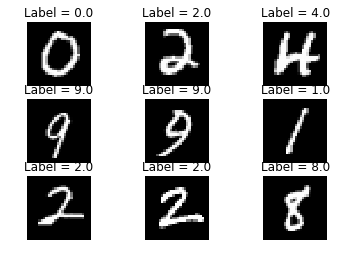

In [3]:
# Display the number of samples 
print "(Number of samples, No. of pixels) = ", mnist.data.shape
print 'labels are: ',set(mnist.target)
print 'total number of classes = %d'%(len(set(mnist.target)))

# Display 9 number randomly selectly
for c in range(1, 10):
    subplot(3, 3,c)
    i = randint(mnist.data.shape[0])
    im = mnist.data[i].reshape((28,28))
    axis("off")
    title("Label = {}".format(mnist.target[i]))
    imshow(im, cmap='gray')

### 划分训练集、测试集

In [4]:
# Split the data into training and test data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.05, random_state=42)
print 'num of train examples:%d, num of test examples:%d'%(len(x_train), len(x_test))
# Which is same as 
# x_train = mnist.data[:split]
# y_train = mnist.target[:split]
# x_test = mnist.data[split:]
# y_test = mnist.target[split:]

num of train examples:66500, num of test examples:3500


/Users/chenhongsheng/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 加载并初始化分类器

In [6]:
# Create the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

### 训练并计算测试集上的准确率、PRF

In [7]:
# Perform the predictions
clf.fit(x_train,y_train)
# Perform the predictions
y_predicted = clf.predict(x_test)
# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print "Accuracy = {} %".format(accuracy_score(y_test, y_predicted)*100)
# Cross validate the scores
from sklearn.metrics import classification_report
print "Classification Report \n {}".format(classification_report(y_test, y_predicted, labels=range(0,10)))

Accuracy = 81.7142857143 %
Classification Report 
              precision    recall  f1-score   support

          0       0.91      0.89      0.90       320
          1       0.85      0.95      0.90       387
          2       0.89      0.84      0.87       352
          3       0.78      0.81      0.80       356
          4       0.83      0.73      0.78       329
          5       0.85      0.67      0.75       342
          6       0.90      0.91      0.91       377
          7       0.94      0.82      0.87       360
          8       0.63      0.72      0.67       337
          9       0.66      0.80      0.72       340

avg / total       0.83      0.82      0.82      3500

